In [7]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from textblob import TextBlob
from sklearn import preprocessing


In [2]:
dados = pd.read_csv("data.csv")
dados.shape

(5842, 2)

In [3]:
# resumo estatistico das colunas
dados.describe()

,Sentence,Sentiment
count,5842,5842
unique,5322,3
top,Managing Director 's comments : `` Net sales f...,neutral
freq,2,3130


In [ ]:
dados.isnull().sum()

In [4]:
df = pd.DataFrame(dados)
df.columns = ["texto", "sentimento"]
df

,texto,sentimento
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


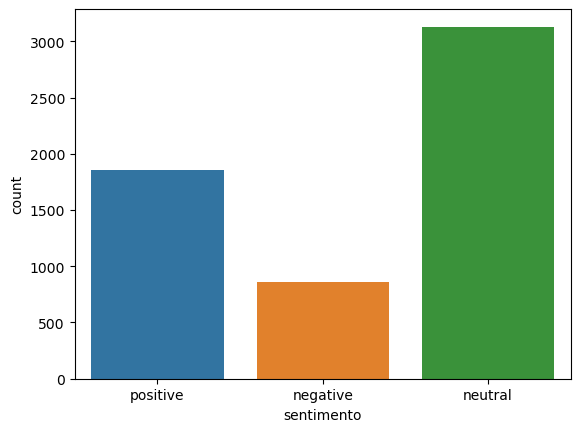

In [5]:
sb.countplot(x='sentimento',data=df)
plt.show()

In [9]:
labelencoder = preprocessing.LabelEncoder()
df["sentimento"] = labelencoder.fit_transform(df["sentimento"])
print(df["sentimento"]) # 2 = positivo, 0 = negativo e 1= neutro

0       2
1       0
2       2
3       1
4       1
       ..
5837    0
5838    1
5839    1
5840    1
5841    2
Name: sentimento, Length: 5842, dtype: int32


In [10]:
# Separar os dados em X (features) e y (labels)
X = df['texto']
y = df['sentimento']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

# Vetorização do texto usando Bag of Words
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [11]:
# Criar e treinar o modelo Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

# Fazer previsões no conjunto de teste
y_pred_nb = nb_model.predict(X_test_vec)

# Avaliar o desempenho do modelo
print("Resultados do Naive Bayes:")
print("Acurácia:", accuracy_score(y_test, y_pred_nb))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_nb))


Resultados do Naive Bayes:
Acurácia: 0.7108639863130881

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.45      0.31      0.37       175
           1       0.74      0.86      0.79       622
           2       0.74      0.65      0.70       372

    accuracy                           0.71      1169
   macro avg       0.65      0.61      0.62      1169
weighted avg       0.70      0.71      0.70      1169



In [12]:
# Função para converter polaridade do TextBlob em rótulos
def textblob_sentiment_analysis(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 2  # Positivo
    elif polarity == 0:
        return 1  # Neutro
    else:
        return 0  # Negativo

# Aplicar a análise de sentimento no conjunto de teste
y_pred_textblob = X_test.apply(textblob_sentiment_analysis)

# Avaliar o desempenho da análise de sentimento
print("Resultados do TextBlob:")
print("Acurácia:", accuracy_score(y_test, y_pred_textblob))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_textblob))


Resultados do TextBlob:
Acurácia: 0.43798118049615054

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.25      0.33      0.28       175
           1       0.54      0.50      0.52       622
           2       0.40      0.39      0.39       372

    accuracy                           0.44      1169
   macro avg       0.40      0.40      0.40      1169
weighted avg       0.45      0.44      0.44      1169



In [13]:
print("Comparação de Desempenho:")
print(f"Naive Bayes - Acurácia: {accuracy_score(y_test, y_pred_nb):.2f}")
print(f"TextBlob   - Acurácia: {accuracy_score(y_test, y_pred_textblob):.2f}")


Comparação de Desempenho:
Naive Bayes - Acurácia: 0.71
TextBlob   - Acurácia: 0.44
